In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler    
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

test_data = pd.read_csv('wdbc_test.csv')
train_data = pd.read_csv('wdbc_training.csv')

train_data.head()

,ID number,Diagnosis,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32
0,853612,4,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.15460,0.4761,0.14020
1,8610404,4,16.070,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
2,861103,2,11.450,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,...,13.11,32.16,84.53,525.1,0.1557,0.1676,0.1755,0.06127,0.2762,0.08851
3,863031,2,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,...,13.14,29.26,85.51,521.7,0.1688,0.2660,0.2873,0.12180,0.2806,0.09097
4,864033,2,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.01778,...,11.05,21.47,71.68,367.0,0.1467,0.1765,0.1300,0.05334,0.2533,0.08468


In [159]:
train_label = train_data.iloc[:,1]
first_chosen_train_rows = train_data.iloc[:,4:5]
second_chosen_train_rows = train_data.iloc[:,5:6]



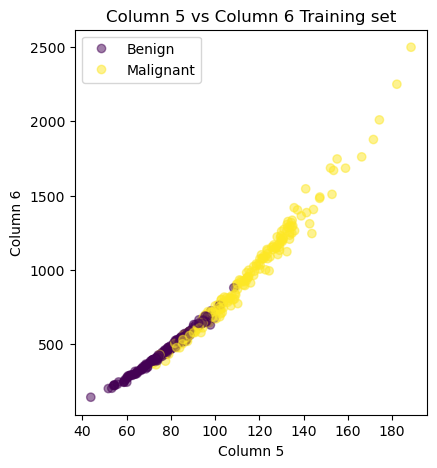

In [160]:


figure = plt.figure(figsize = (10, 5))
plt.subplot(121)
dots_trn = plt.scatter(first_chosen_train_rows, 
                       second_chosen_train_rows, c = train_label, alpha = 0.5)
plt.title('Column 5 vs Column 6 Training set')
plt.xlabel('Column 5')
plt.ylabel('Column 6')
classes = ['Benign', 'Malignant']
plt.legend(handles = dots_trn.legend_elements()[0], labels = classes)

figure.savefig('Column5_Vs_Column6.png')

In [161]:

training_inputs = train_data.iloc[:, 2:31]
test_inputs = test_data.iloc[:, 2:31]

scaler = StandardScaler().fit(training_inputs)
train_data_std = scaler.transform(training_inputs)
test_data_std = scaler.transform(test_inputs)

print(train_data_std)

[[-0.76474101 -0.14059825 -0.69883287 ...  1.77253336  0.4096931
   2.56224508]
 [ 0.39042091  0.08578876  0.3374414  ... -0.08666952  0.37225044
  -0.50215692]
 [-0.8712453   0.40034756 -0.86197578 ... -0.57050376 -0.93435451
  -0.33957378]
 ...
 [-0.59815738 -0.85550461 -0.51509911 ...  1.05128698  0.69051308
   1.43577613]
 [-0.40153407  0.60052134 -0.40224539 ...  0.31832766  0.49753935
   1.01189864]
 [-0.78658805  0.5504779  -0.82594179 ... -1.11231701 -1.28170722
  -0.81716177]]


Principal Component 1: Explained Variance Ratio = 0.4510
Principal Component 2: Explained Variance Ratio = 0.1859
Principal Component 3: Explained Variance Ratio = 0.0990
Principal Component 4: Explained Variance Ratio = 0.0605
Principal Component 5: Explained Variance Ratio = 0.0508
Principal Component 6: Explained Variance Ratio = 0.0410
Principal Component 7: Explained Variance Ratio = 0.0206
Principal Component 8: Explained Variance Ratio = 0.0166
Principal Component 9: Explained Variance Ratio = 0.0143
Principal Component 10: Explained Variance Ratio = 0.0118
Principal Component 11: Explained Variance Ratio = 0.0110
Principal Component 12: Explained Variance Ratio = 0.0088
Principal Component 13: Explained Variance Ratio = 0.0081
Principal Component 14: Explained Variance Ratio = 0.0051
Principal Component 15: Explained Variance Ratio = 0.0031
Principal Component 16: Explained Variance Ratio = 0.0022
Principal Component 17: Explained Variance Ratio = 0.0020
Principal Component 18:

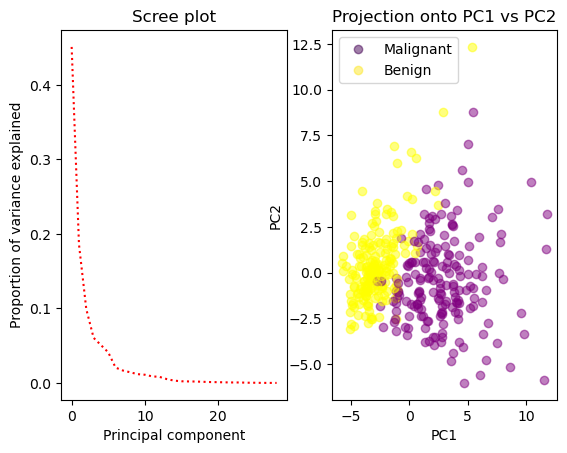

In [162]:

pca = PCA()
train_out = pca.fit_transform(train_data_std)

figure = plt.figure()
plt.subplot(1, 2, 1)

ax = plt.gca()
plt.plot(pca.explained_variance_ratio_, color = 'red', linestyle = 'dotted')
ax.set_title('Scree plot')
ax.set_xlabel('Principal component')
ax.set_ylabel('Proportion of variance explained') 

plt.subplot(1, 2, 2)
for i in range(len(train_label)):
    if train_label[i] == 4:  
        plt.scatter(train_out[i][0], train_out[i][1], c='purple', label='Malignant', alpha = 0.5)
    elif train_label[i] == 2: 
        plt.scatter(train_out[i][0], train_out[i][1], c='yellow', label='Benign', alpha = 0.5)
plt.title('Projection onto PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
classes = ['Malignant', 'Benign']
plt.legend(handles = dots_trn.legend_elements()[0], labels = classes)

figure.savefig('ScreeGraph.png')
explained_variance_ratio = pca.explained_variance_ratio_

for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: Explained Variance Ratio = {ratio:.4f}")

Number of datasets in training set = 288
Number of datasets in validation set = 72

Mean of training column 3: 0.004158901526108935
Mean of training column 4: -0.03940259356362127
Mean of training column 5: 0.003919356672095007
Mean of training column 6: 0.009431853644397036
Mean of training column 7: -0.013028390637067995
Mean of training column 8: -0.011973296863888273
Mean of training column 9: 0.00513287228944773
Mean of training column 10: -0.0059118508999463325
Mean of training column 11: -0.034353922735488665
Mean of training column 12: 0.005277326892015284
Mean of training column 13: -0.011088906513548121
Mean of training column 14: -0.03300107051007184
Mean of training column 15: -0.005455734345501105
Mean of training column 16: -0.009064608911029606
Mean of training column 17: 0.0002978227385171193
Mean of training column 18: 0.0011180618159058364
Mean of training column 19: 0.00867844985279186
Mean of training column 20: -0.02592493900172911
Mean of training column 21: -0.01

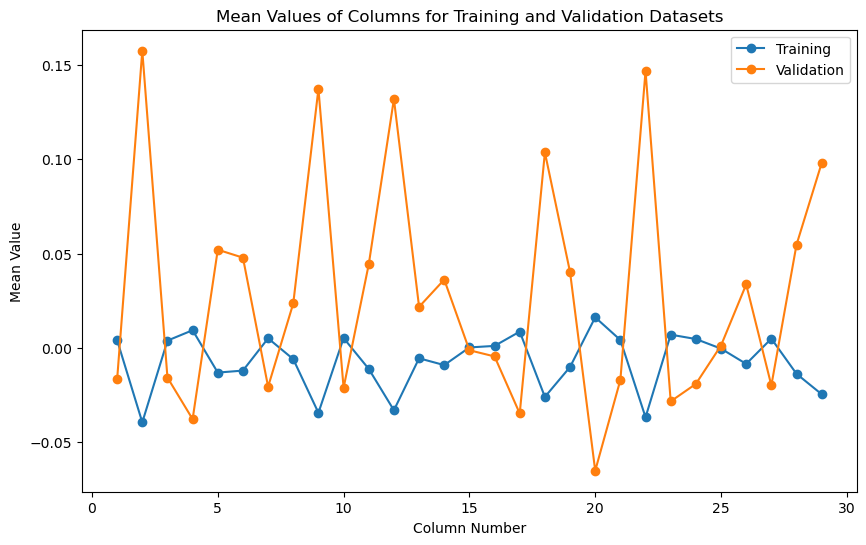

In [163]:
import numpy as np

scaler = StandardScaler()
train_data_std = scaler.fit_transform(training_inputs)

x_train, x_val, y_train, y_val = train_test_split(train_data_std,
                    train_label, test_size=0.2, random_state=0)
print (f'Number of datasets in training set = {len(x_train)}')
print (f'Number of datasets in validation set = {len(x_val)}\n')

train_data_means = x_train.mean(axis=0)
for i, mean in enumerate(train_data_means):
    print(f"Mean of training column {i + 3}: {mean}")

val_data_means = x_val.mean(axis=0)
for i, mean in enumerate(val_data_means):
    print(f"Mean of validation column {i + 3}: {mean}")

figure = plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_data_means) + 1), train_data_means, marker='o', label='Training')
plt.plot(range(1, len(val_data_means) + 1), val_data_means, marker='o', label='Validation')

plt.xlabel('Column Number')
plt.ylabel('Mean Value')
plt.title('Mean Values of Columns for Training and Validation Datasets')
plt.legend()


figure.savefig('Mean_Values_of_Columns.png')

In [164]:

def train_and_evaluate_svm(kernel, C, gamma=None):
    if kernel == 'linear':
        model = SVC(kernel='linear', C=C)
    elif kernel == 'rbf':
        model = SVC(kernel='rbf', C=C, gamma=gamma)
    else:
        raise ValueError("Invalid kernel specified.")
    model.fit(x_train, y_train)
    prediction = model.predict(x_val)
    accuracy = accuracy_score(y_val, prediction)
    confusion_mat = confusion_matrix(y_val, prediction)
    return accuracy, confusion_mat

C_values = [2, 12, 24]
results = {}
confusion_matrices_linear = {}
for C in C_values:
    accuracy, confusion_mat = train_and_evaluate_svm(kernel='linear', C=C)
    results[C] = accuracy
    confusion_matrices_linear[C] = confusion_mat
    print(f"\nResults for linear kernel with C={C}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion_mat)


print("##############################################")

rbf_C_values = [2, 12, 24]
rbf_gamma_values = [0.01, 0.1, 0.2]

rbf_results = {}
confusion_matrices_rbf = {}
for C in rbf_C_values:
    for gamma in rbf_gamma_values:
        accuracy, confusion_mat = train_and_evaluate_svm(kernel='rbf', C=C, gamma=gamma)
        rbf_results[(C, gamma)] = accuracy
        confusion_matrices_rbf[(C, gamma)] = confusion_mat
        print(f"\nResults for RBF kernel with C={C} and gamma={gamma}:")
        print("Accuracy:", accuracy)
        print("Confusion Matrix:")
        print(confusion_mat)

print("##############################################")

best_linear_C = max(results, key=results.get)
best_rbf_values = max(rbf_results, key=rbf_results.get)

print("Best performing model with linear kernel:")
print(f"C value: {best_linear_C}, Accuracy: {results[best_linear_C]}")
print("\nBest performing model with RBF kernel:")
print(f"C value: {best_rbf_values[0]}, Gamma value: {best_rbf_values[1]}, Accuracy: {rbf_results[best_rbf_values]}")



Results for linear kernel with C=2:
Accuracy: 0.9305555555555556
Confusion Matrix:
[[34  1]
 [ 4 33]]

Results for linear kernel with C=12:
Accuracy: 0.9583333333333334
Confusion Matrix:
[[33  2]
 [ 1 36]]

Results for linear kernel with C=24:
Accuracy: 0.9444444444444444
Confusion Matrix:
[[32  3]
 [ 1 36]]
##############################################

Results for RBF kernel with C=2 and gamma=0.01:
Accuracy: 0.9444444444444444
Confusion Matrix:
[[33  2]
 [ 2 35]]

Results for RBF kernel with C=2 and gamma=0.1:
Accuracy: 0.9305555555555556
Confusion Matrix:
[[32  3]
 [ 2 35]]

Results for RBF kernel with C=2 and gamma=0.2:
Accuracy: 0.9027777777777778
Confusion Matrix:
[[30  5]
 [ 2 35]]

Results for RBF kernel with C=12 and gamma=0.01:
Accuracy: 0.9583333333333334
Confusion Matrix:
[[34  1]
 [ 2 35]]

Results for RBF kernel with C=12 and gamma=0.1:
Accuracy: 0.9166666666666666
Confusion Matrix:
[[31  4]
 [ 2 35]]

Results for RBF kernel with C=12 and gamma=0.2:
Accuracy: 0.9027777

In [165]:
scaler = StandardScaler()
test_data = pd.read_csv('wdbc_test.csv')
test_data_std = scaler.fit_transform(test_data.iloc[:, 2:31])
test_label = test_data.iloc[:,1]

svc = SVC(kernel='rbf', C=best_rbf_values[0], gamma=best_rbf_values[1])
svc.fit(x_train, y_train)   
test_predictions = svc.predict(test_data_std)

test_accuracy = accuracy_score(test_label, test_predictions)
confusion_mat = confusion_matrix(test_label, test_predictions)

print("Test Results:")
print(f"Accuracy Rate: {test_accuracy}")
print("Confusion Matrix:")
print(confusion_mat)

Test Results:
Accuracy Rate: 0.7129186602870813
Confusion Matrix:
[[117  60]
 [  0  32]]


In [166]:
scaler = StandardScaler()
reduced_training_inputs = train_data.iloc[:, 2:11]
reduced_train_data_scaled = scaler.fit_transform(reduced_training_inputs)

x_train, x_val, y_train, y_val = train_test_split(reduced_train_data_scaled, train_label, test_size=0.2, random_state=0)

reduced_svc = SVC(kernel='rbf', C=best_rbf_values[0], gamma=best_rbf_values[1])
reduced_svc.fit(x_train, y_train)
test_predictions = reduced_svc.predict(x_val)

test_accuracy = accuracy_score(y_val, test_predictions)
confusion_mat = confusion_matrix(y_val, test_predictions)

print("Test Results:")
print(f"Accuracy Rate: {test_accuracy}")
print("Confusion Matrix:")
print(confusion_mat)


Test Results:
Accuracy Rate: 0.9166666666666666
Confusion Matrix:
[[32  3]
 [ 3 34]]


In [167]:

reduced_test_inputs = test_data.iloc[:, 2:11]
reduced_test_data_scaled = scaler.fit_transform(reduced_test_inputs)

test_predictions = reduced_svc.predict(reduced_test_data_scaled)

test_accuracy = accuracy_score(test_label, test_predictions)
confusion_mat = confusion_matrix(test_label, test_predictions)

print("Test Results:")
print(f"Accuracy Rate: {test_accuracy}")
print("Confusion Matrix:")
print(confusion_mat)


## its finally over :D 

Test Results:
Accuracy Rate: 0.6985645933014354
Confusion Matrix:
[[114  63]
 [  0  32]]
